# **Ukraine Russia War Twitter Sentiment Analysis**

Tweets Data come from Kaggle, [Russia-Ukraine Tweet Data Collection](https://www.kaggle.com/datasets/towhidultonmoy/russia-vs-ukraine-tweets-datasetdaily-updated).

## Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

## Loading Dataset

In [3]:
df = pd.read_csv("tweetsdata.csv")
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1581458719845781504,1581407763250311168,2022-10-16 01:35:15 UTC,2022-10-16,01:35:15,0,1577805690185342976,lace891,Lace89,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'AaronParnas', 'name': 'Aaron...",NaN,NaN,NaN,NaN
1,1581458717585068034,1581458717585068034,2022-10-16 01:35:15 UTC,2022-10-16,01:35:15,0,3195763956,latinos4bernie,Our Revolución,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1581458717194665985,1581382234841370630,2022-10-16 01:35:14 UTC,2022-10-16,01:35:14,0,2251978568,dennisp220,"Freedom Loving ULTRA MAGA,🇺🇸🌴🦩🐊🐬🏖 🩴🦈😎✝️",NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'johnstone_tin', 'name': 'Tom...",NaN,NaN,NaN,NaN
3,1581458708877684736,1581259880928710656,2022-10-16 01:35:12 UTC,2022-10-16,01:35:12,0,1502425378001850370,jstarbux,Jon Starbux,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MissFlyByNight', 'name': '🌛 ...",NaN,NaN,NaN,NaN
4,1581458704422928384,1581431262476005377,2022-10-16 01:35:11 UTC,2022-10-16,01:35:11,0,1195425713182015488,micahbabcock4,Micah Babcock,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Terri80501', 'name': 'sleepl...",NaN,NaN,NaN,NaN


In [4]:
#column names of the dataset
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

## Getting started 
We only need three columns for this task (username, tweet, and language); I will only select these columns and move forward:

In [6]:
df = df[["username", "tweet", "language"]]

In [7]:
df.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [8]:
df["language"].value_counts()

en     8833
pt      328
qme     215
ja       80
und      77
in       77
ru       69
it       69
es       34
ca       27
de       18
ar       18
fi       14
nl       12
ur       11
pl       11
hi       10
th       10
fr        9
zh        9
tl        8
qht       8
qam       7
uk        7
et        6
zxx       5
sv        5
fa        5
ro        4
vi        3
no        3
cs        3
ht        2
tr        2
ml        1
art       1
cy        1
ta        1
Name: language, dtype: int64

So most of the tweets are in English. Let’s prepare this data for the task of sentiment analysis. Here I will remove all the links, punctuation, symbols and other language errors from the tweets:

In [10]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war:

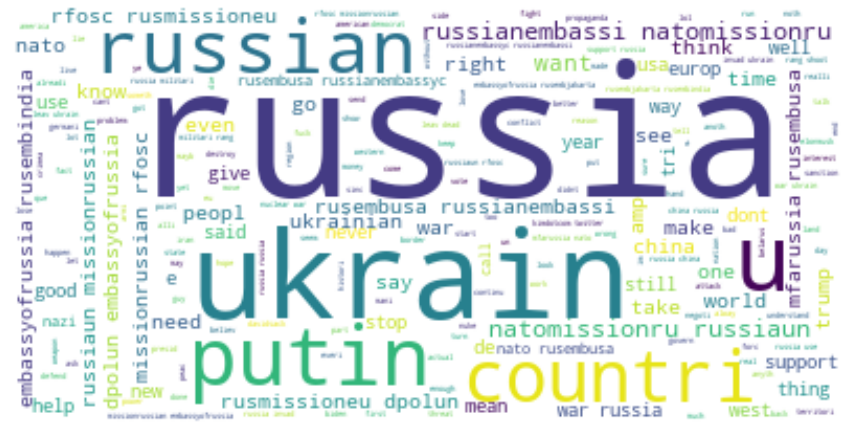

In [11]:
text = " ".join(i for i in df.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:

In [13]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["tweet"]]
df = df[["tweet", "Positive", "Negative", "Neutral"]]
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,tweet,Positive,Negative,Neutral
0,aaronparna corrupt countri europ give littl pi...,0.000,0.336,0.664
1,russia kidnap traffick ukrainian children russ...,0.000,0.000,1.000
2,johnstonetin jonathanturley fbi agent fail rus...,0.079,0.201,0.719
3,missflybynight russia left over,0.000,0.000,1.000
4,johnfetterman democrat brought you… open bo...,0.000,0.413,0.587


Now let’s have a look at the most frequent words used by people with positive sentiments:

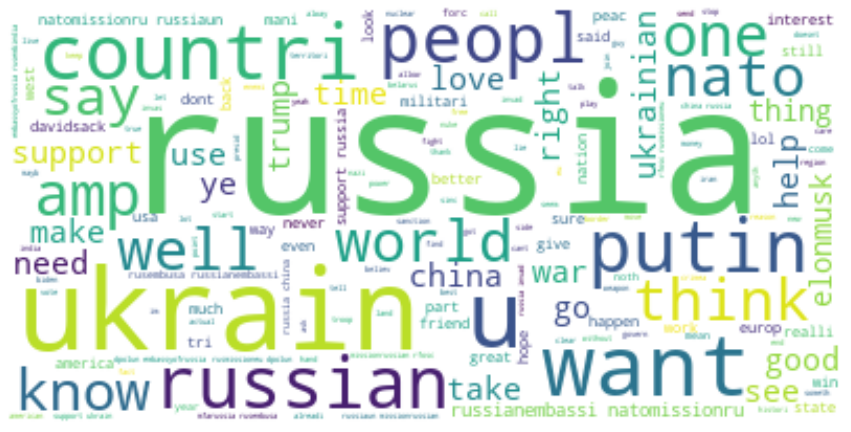

In [14]:
positive =' '.join([i for i in df['tweet'][df['Positive'] > df["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the most frequent words used by people with negative sentiments:

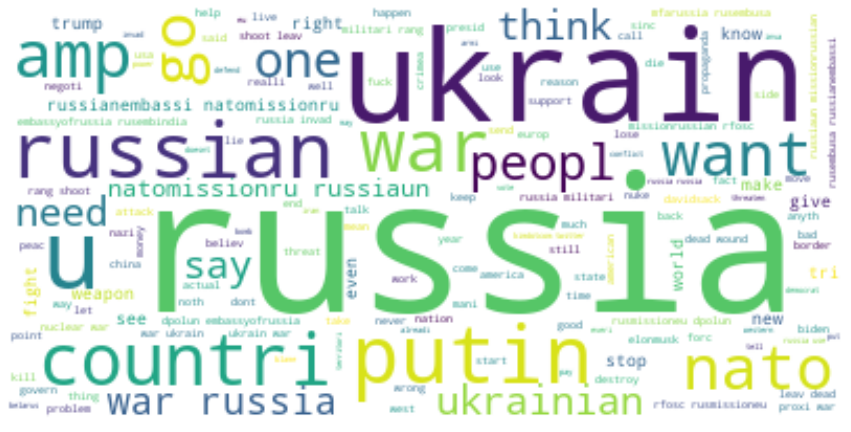

In [15]:
negative =' '.join([i for i in df['tweet'][df['Negative'] > df["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

So this is how you can analyze the sentiments of people over the Ukraine and Russia war. 